In [1]:
import pandas as pd
import numpy as np
import datetime
# Assuming you have a DataFrame named 'subset'
df = pd.read_json(r'C:\Users\ahmad\Downloads\lighter_books.json', lines = True, nrows = 150000)
columns_to_drop = ['isbn', 'isbn13', 'asin', 'edition_information', 'publisher', 'series_id', 'series_name', 'series_position', 'description', 'shelves']
#cleaning the dataset
df.drop(columns=columns_to_drop, inplace=True)
df = df[df['title'].notna()]
df = df[df['ratings_count']>= 0]
df = df[df['text_reviews_count']>= 0]

df['num_pages'] = df['num_pages'].replace('', np.nan)
df['num_pages'].fillna(0, inplace=True)
df['num_pages'] = df['num_pages'].astype(int)
df = df[df['num_pages']>= 0]

# Print information about the 'df' DataFrame
print(df.info())
print(df.columns)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149974 entries, 0 to 149973
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         149974 non-null  int64  
 1   title                      149974 non-null  object 
 2   authors                    51240 non-null   object 
 3   author_name                149974 non-null  object 
 4   author_id                  149974 non-null  int64  
 5   work_id                    149974 non-null  int64  
 6   language                   149974 non-null  object 
 7   average_rating             149974 non-null  float64
 8   rating_dist                149974 non-null  object 
 9   ratings_count              149974 non-null  int64  
 10  text_reviews_count         149974 non-null  int64  
 11  publication_date           149974 non-null  object 
 12  original_publication_date  149974 non-null  object 
 13  format                     14

In [73]:
#book with the highest rating RQ 2.1
book_with_highest_reviews = df['average_rating'].idxmax()

book = df.loc[book_with_highest_reviews]['title']

print(book)

Later Letters of Edward Lear to Chichester Fortescue (Select Bibliographies Reprint Ser.))


In [74]:
#RQ 2.2
# Sort the DataFrame by 'average_score' in descending order to find the top ten books

top_ten_books = df.sort_values(by='average_rating', ascending=False).head(10)

# Sort the DataFrame by 'average_score' in ascending order to find the bottom ten books
bottom_ten_books = df.sort_values(by='average_rating').head(10)
print("Books with highest scores:")
print( top_ten_books[['title', 'average_rating']])
print("\n Books with lowest scores:")
print( bottom_ten_books[['title', 'average_rating']])

Books with highest scores:
                                                    title  average_rating
118623  The 2007 Import and Export Market for Metal Ge...             5.0
125000  Indigo Days: The Art and Memoirs of Julian Tre...             5.0
31215           F. Scott Fitzgerald's Ledger: A Facsimile             5.0
87792          Health Benefits of Phosphatidylserine (Ps)             5.0
95815             Building World Landmarks: ARC Dtriomphe             5.0
83517   Best of Bluegrass: 10 Must-Know Songs Arranged...             5.0
65129   Sitting Bull and the Plains Indians (Life & Ti...             5.0
134584                                   The Flame Forest             5.0
116659  Monarch Notes for E.M. Forster's A Passage to ...             5.0
87808   E-Book Functionality: What Libraries and Their...             5.0

 Books with lowest scores:
                                                    title  average_rating
125269  Negev, Land, Water, and Life in a Desert Envir...

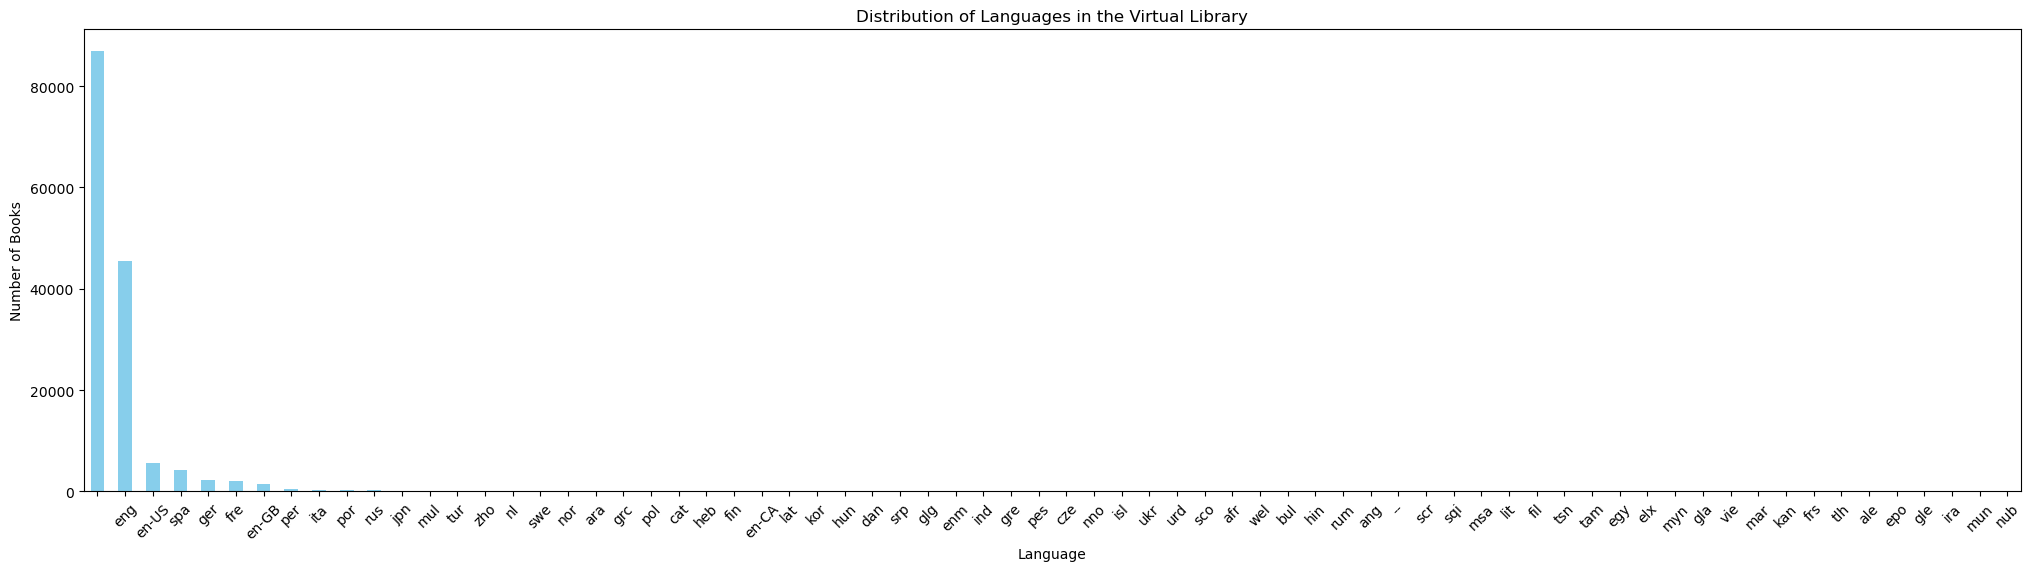

In [75]:
#RQ 2.3 plot for languages
import matplotlib.pyplot as plt
languages = df['language'].value_counts()
plt.figure(figsize=(25, 6))
languages.plot(kind='bar', color='skyblue')
plt.title('Distribution of Languages in the Virtual Library')
plt.xlabel('Language')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

In [76]:
#RQ2.4 BOOKS W/ MORE THAN 250 PAGES
most_pages = df[df['num_pages'] > 250]
for title in most_pages['title']:
    print(title)

Harry Potter and the Order of the Phoenix (Harry Potter, #5)
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)
Harry Potter and the Chamber of Secrets (Harry Potter, #2)
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)
Harry Potter and the Goblet of Fire (Harry Potter, #4)
Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)
Harry Potter Collection (Harry Potter, #1-6)
The Ultimate Hitchhiker's Guide: Five Complete Novels and One Story (Hitchhiker's Guide to the Galaxy, #1-5)
The Ultimate Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1-5)
The Ultimate Hitchhiker's Guide (Hitchhiker's Guide to the Galaxy, #1-5)
A Short History of Nearly Everything
Bryson's Dictionary of Troublesome Words: A Writer's Guide to Getting It Right
In a Sunburned Country
I'm a Stranger Here Myself: Notes on Returning to America After Twenty Years Away
The Lost Continent: Travels in Small Town America
Neither Here nor There: Travels in Europe
Notes from a Small Island


In [77]:
df['original_publication_date'] = df['original_publication_date'].apply(lambda x: x[1:] + 'BC' if x.startswith('-') else x)
for date in df['original_publication_date']:
    print(date)

2003-06-21
1997-06-26
1998-07-02
1999-07-08
2000-07-08
2005-01-01
2003-10-01
2005-01-01
1979-10-12
1996-01-17
1996-01-17
1979-10-12
2005-12-01
1979-10-12
2005-05-23
1996-01-17
2005-06-20
2003-05-06
2002
1984
2000-06-18
1999-05-12
1989-08-01
1991
1995-09-07
1990-07-17
1955-10-20
1955-10-20
1955-10-20
1955-10-20
1954-07-29
1955-10-20
2003-09
2004
1955-10-20

2004
2006-08-01
1938
2000-10-18
1987-09-30
1987-09-30
2001-01-01
2003-06-10
2004-05-19
2005-11-04
2006-08-17
1988-10-01
2005
1970
2003-12-30
2006
1989-05-03
2003-09
2003-09
2003-09
2006-04-20
2005-12-14
2003-09
1976
2006-05-16
1986-04-01
1989
1998-06-10
1977
1983
1972
1996-02-28
1986-11-17

1988
1988
2003-01-31
2005-08-28
2006-03-29
2001-07-02
1997-01-28
1880
2004-01-01
2000-01-28
2001-07-02
2007-01-01
1989-05-30
2004-05-10
2005-08-01
2006
1981-05-06
1965-06
1985-04
1969-10
2000-09-05
2000-10-01
1984-04-01
2005-01-01
1981-05-06
1976-04-21
1965-06
1979-04
1980-10-01
1984-06
1984-04-01
1994-01-04
2002-06-12
1999-12-30
1991-03
1989
1989

In [105]:
# Split the 'original_publication_date' column on the '-' character and select the second part (the month)
df['publication_month'] = df['original_publication_date'].str.split("-").str[1]

df['publication_month'] = df['publication_month'].apply(lambda x: "No month specified" if pd.isna(x) else x)
df['publication_month'] = pd.to_numeric(df['publication_month'], errors='coerce')
df['publication_month'] = df['publication_month'].apply(lambda x: "No month specified" if pd.isna(x) or x > 12  else x)
numbooksinmonth = df['publication_month'].value_counts()
most_prolific_month = numbooksinmonth .idxmax()     
print(most_prolific_month)

No month specified


In [7]:
def historical_look(year):
    # the function has to output
    # a. number of books published in that year
    # b. number of pages written
    # c. most prolific month
    # d. longest written book
    

    df['publication_year'] = df['original_publication_date'].str.split('-').str[0]
    df['publication_month'] = df['original_publication_date'].str.split("-").str[1]

    df['publication_month'] = df['publication_month'].apply(lambda x: "No month specified" if pd.isna(x) else x)
    df['publication_month'] = pd.to_numeric(df['publication_month'], errors='coerce')
    df['publication_month'] = df['publication_month'].apply(lambda x: "No month specified" if pd.isna(x) or x > 12  else x)

    matching_books = df[df['publication_year'] == year]
    if matching_books['title'].count() != 0:
        print(f'number of books published in {year} is: ')
        print(matching_books['title'].count())
        # Replace NaN values in the "num_pages" column with 0
        matching_books['num_pages'].fillna(0, inplace=True)

        # Calculate the sum of the "num_pages" column
        total_pages = matching_books['num_pages'].sum()
        print('total number of pages is')
        print(total_pages)
        # longest written book
        sorted_by_numpages = matching_books.sort_values(by='num_pages', ascending=False)
        if not sorted_by_numpages.empty:
            bigbook = sorted_by_numpages.iloc[0]

            print(f"The longest book written is '{bigbook['title']}' with {bigbook['num_pages']} pages.")
        #most prolific month:
        month_counts = df['publication_month'].value_counts().sort_values(ascending=False)

        most_prolific_month = month_counts.idxmax() 
        if most_prolific_month == 'No month specified':
            second_most_prolific_month = month_counts.index[1]
            second_most_prolific_month = int(second_most_prolific_month)
            year = int(year)
            month_name = datetime.date(year, second_most_prolific_month, 1).strftime('%B')

            print(f'this is the most prolific month{month_name}')
        else:
            print(f'{most_prolific_month} is the most prolific month')
    else:
        print('No books were written that year in this database')
year = input()
historical_look(year)


number of books published in 2001 is: 
5636
total number of pages is
1288351
The longest book written is 'The Cambridge History of the English Language 6 Volume Set' with 4330 pages.
this is the most prolific monthJanuary


C:\Users\ahmad\AppData\Local\Temp\ipykernel_16720\516441462.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_books['num_pages'].fillna(0, inplace=True)


In [35]:
1`for work_id in df['work_id'].values:
    print(work_id)


2809203
4640799
6231171
2402163
3046572
21457570
21457576
21457570
3078186
135328
135328
3078186
4409
3078186
69899216
135328
17243229
2305997
1998364
4360697
2611786
3419048
1888943
3164459
940892
2170063
89369
3462456
3462456
3462456
3204327
3462456
4414
4415
3462456
62400415
4417
4418
1483593
4420
1158125
1158125
67763
4423
4424
4426
4427
2085180
4428
1738165
4431
815436
4434
1062798
1062798
1062798
4436
4437
1062798
4438
4439
4440
1391038
88676
518787
349509
518811
4446
1391039
56023144
17506124
4450
4451
4452
4453
4455
4456
1738595
4458
4459
4455
430590
4462
4463
4465
4466
3634588
3634639
3634569
3634570
772029
4470
3634575
4472
3634588
3634573
3634639
551
4475
1009000
3634575
4478
4479
907643
969174
649656
649656
4482
649656
4483
4484
4485
4486
7042640
4488
4492
6900774
4497
4501
4503
2507928
2507928
2507928
2507928
2507928
2507928
2507928
4508
869831
4511
1196354
4513
4514
4515
4517
4518
4519
2388621
4523
4524
4528
948387
948387
4531
4528
948387
4537
948387
4540
4543
948387
4547

In [36]:
total_work_ids = df['work_id'].nunique()
print("Total unique work IDs:", total_work_ids)

Total unique work IDs: 109658
